In [47]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from copy import deepcopy



def split(A):
    
    xAxis = []
    yAxis = []

    for i in A:
        xAxis.append(i[0])
        yAxis.append(i[1])

    xAxis.append(A[0][0])
    yAxis.append(A[0][1])
    return xAxis, yAxis



def dist(u,v):
    return math.sqrt((u[0]-v[0])**2+(u[1]-v[1])**2)


def arbitrary_swap(B):
    A = B.copy()
    i, j = random.sample(range(len(A)),2)

    A[i], A[j] = A[j], A[i]

    return A
        

def consecutive_swap(B):

    A=B.copy()  
    i = random.randint(0,len(A)-1)
    j = (i+1)%len(A)

    A[i], A[j] = A[j], A[i]

    return A
    

def alldist(A):
    
    cost = 0
    for i in range(len(A)-1):
        cost += dist(A[i], A[i+1])
    cost += dist(A[len(A)-1], A[0])
    
    return cost 


def calc_propability(old, new, T):
    if T==0:
        return 0
    try:
        return math.exp(-(old - new) / T)
    except OverflowError:
        return 0


def simulated_annealing(A,mode,temperature, steps):

    best = 10e10
       

    n = len(A)
    old_cost = alldist(A)

    for i in range(steps):

        temp = temperature(i)
        new_path = mode(A)
        new_cost = alldist(new_path)
        rand = random.random()
        probability = calc_propability(old_cost, new_cost, temp)

        if (new_cost<old_cost and rand>probability) or (new_cost>best and rand < probability):
            A = new_path
            best = min(new_cost, best)
            old_cost = new_cost

    return A
    

In [48]:


def generate_9_groups(size):
    A = []
    global plotNum
    step = 33
    pointsInEach = int(size/9)

    for i in range(0, 3*step ,step):
        for j in range(0,3*step,step):
            for z in range(pointsInEach):
                u, v = random.randint(i,i+5), random.randint(j,j+5)
                A.append((u,v))

    return A


def generate_gauss(mean=[0, 0],cov=[[1, 0], [0, 100]] ,size=10):
    A = []
    x,y = np.random.multivariate_normal(mean, cov, size).T
    for i in range(size):
        A.append([x[i],y[i]])
    
    return A


def generate_uniform(xy_min = [0,0], xy_max = [10,20], size=20):
    A = np.random.uniform(low=xy_min, high=xy_max, size=(size,2))
    return A


In [49]:

def run(array,function=generate_uniform, start=10,  end=40, step=10, mode=arbitrary_swap, temperature = lambda i: 0.99999**i,title="title",
     steps = 1e5):
    fig = plt.figure(figsize=(12,12))
    plt.suptitle(str(title), fontsize=30 )
    plt.subplots_adjust(hspace=0.5)
    plotNum = 0

    for n in range(start,end,step):
        if len(array)==0:
            if function== generate_gauss:
                array = generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
                array += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
                array += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
                array += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
            else:
                array = function(size=n)


        ax = plt.subplot(3,2,plotNum+1)
        plotNum += 1
        xAxis, yAxis = split(array)
        
        ax = plt.plot(xAxis,yAxis)
        ax = plt.title("before, n = " + str(n))

        x = simulated_annealing(array,mode,temperature,steps = int(steps))

        resX, resY = split(x)
        ax = plt.subplot(3,2, plotNum+1)
        # ax1 = plt.annotate(text="n= "+ str(n), xy=(resX[0],resY[0]+10))
        ax = plt.plot(resX,resY)
        ax = plt.title("after, n =  " + str(n) + ", temperature = 0.99999^n")
        array = []
        
        plotNum += 1


    plt.show()



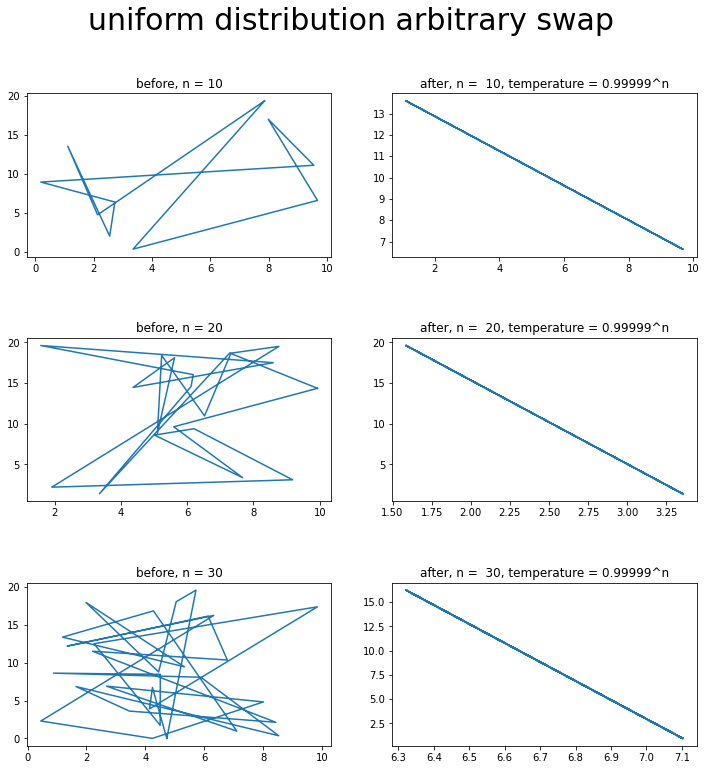

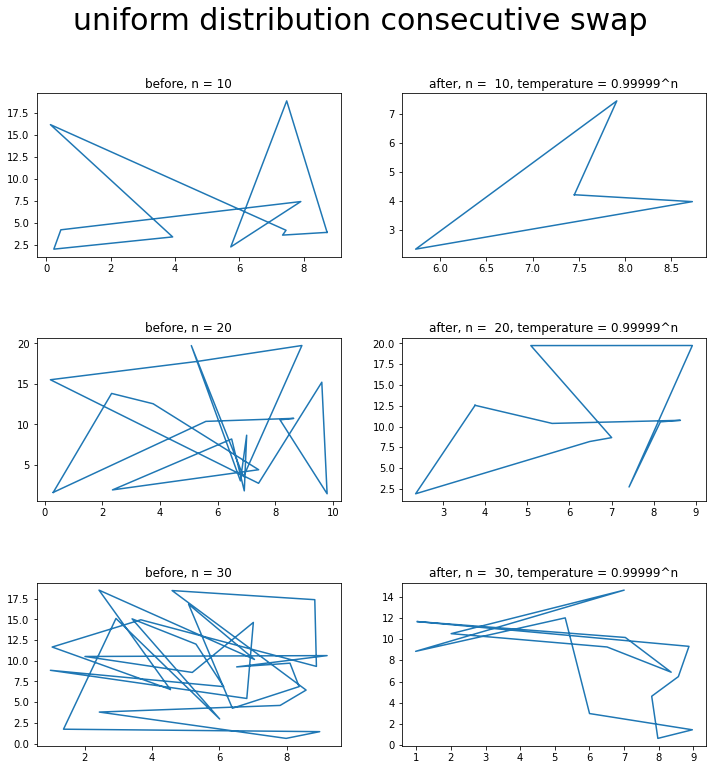

In [50]:
run([],function= generate_uniform,start = 10, end=40, temperature=lambda i: 0.99996*i, title="uniform distribution arbitrary swap",steps=3e5)
run([],function=generate_uniform,start = 10, end=40,mode=consecutive_swap, temperature=lambda i: 0.99996*i, title="uniform distribution consecutive swap",steps=3e5)

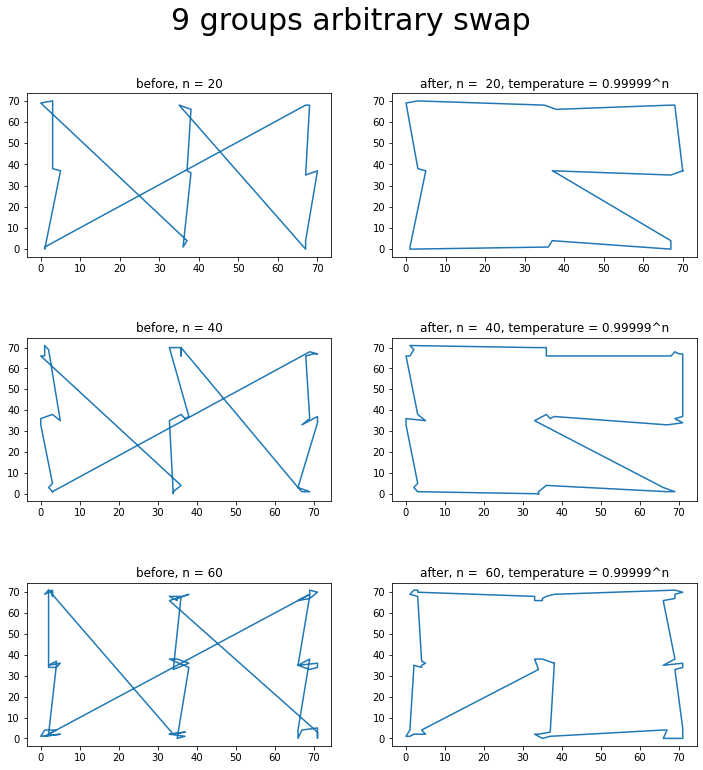

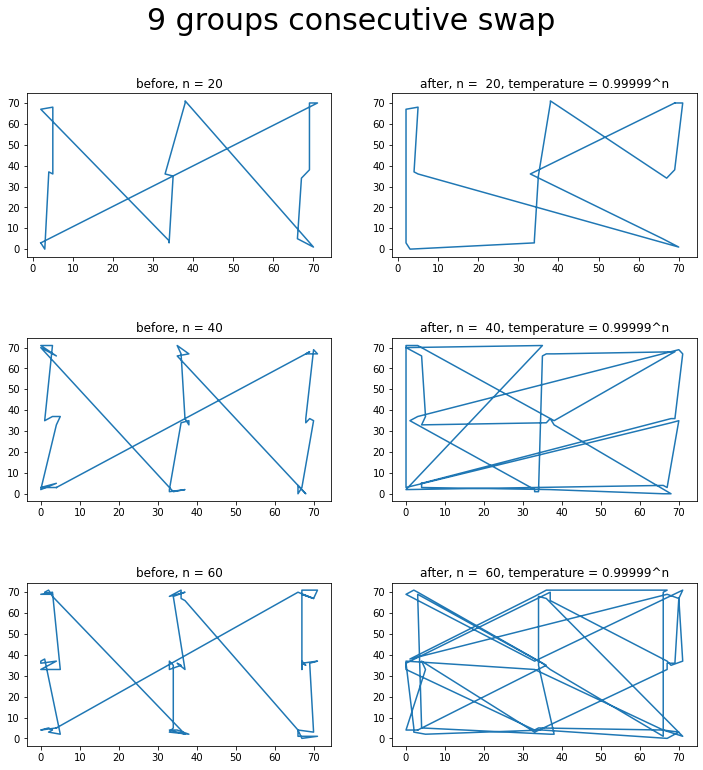

In [51]:
run([],function=generate_9_groups, start=20,end=80,step=20, title="9 groups arbitrary swap",steps = 2e6)
run([],function=generate_9_groups, start=20,end=80,step=20,mode=consecutive_swap, title="9 groups consecutive swap",steps = 2e6)

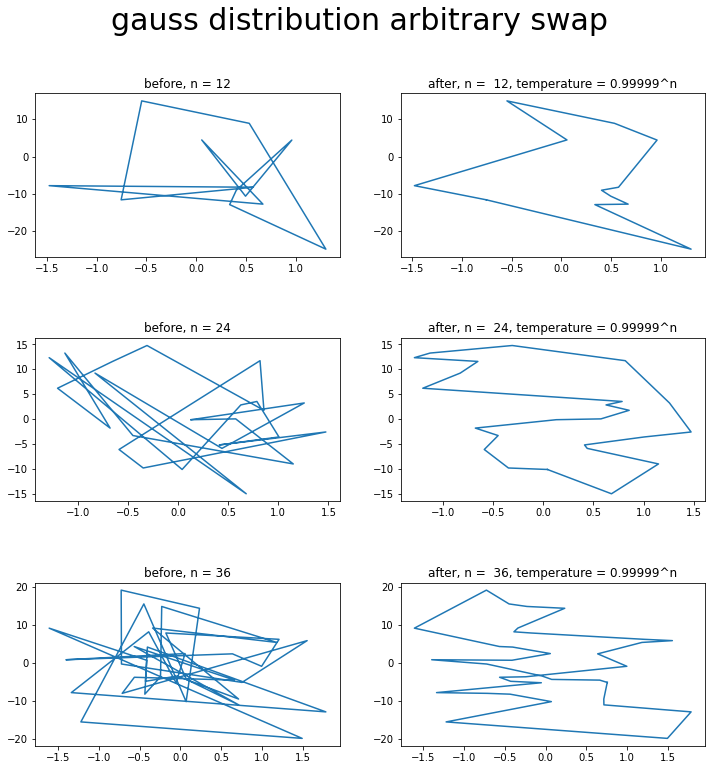

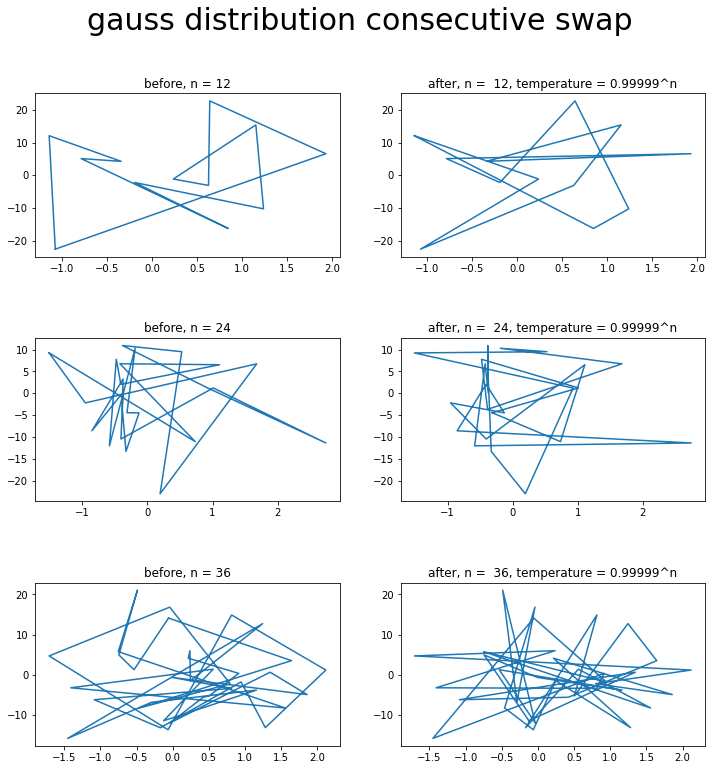

In [52]:
run([],function=generate_gauss,start=12,end = 48,step = 12,title="gauss distribution arbitrary swap",steps = 1e6)
run([],function=generate_gauss,start=12,end = 48,step = 12,temperature=lambda i: 0.99993*i,mode=consecutive_swap,title="gauss distribution consecutive swap",steps = 1e6)

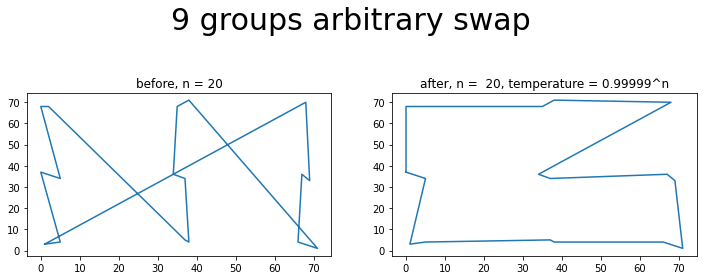

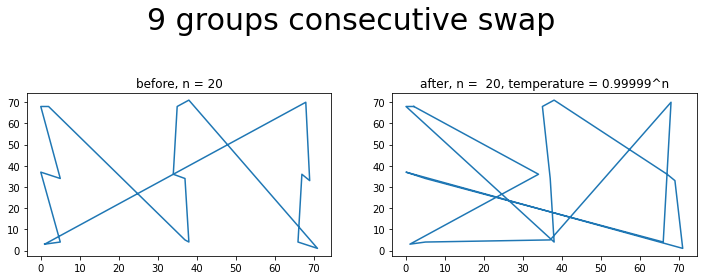

In [53]:
#checking on same data

A = generate_9_groups(size=20)
B = deepcopy(A)
run(array=A, start=20,end=21,step=20, title="9 groups arbitrary swap",steps = 1e6)
run(array=B, start=20,end=21,step=20,mode=consecutive_swap, title="9 groups consecutive swap",steps = 1e6)



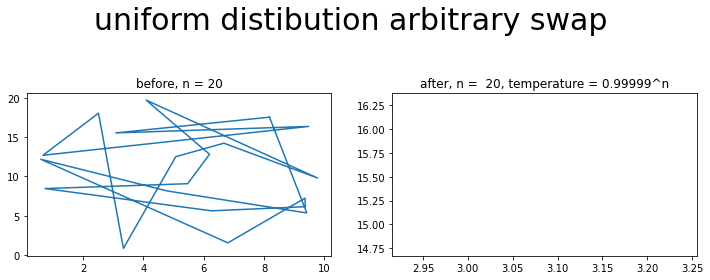

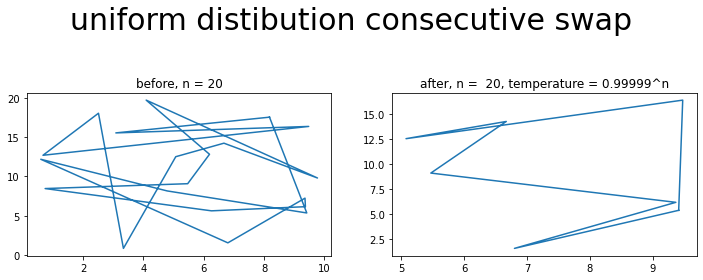

In [54]:
A = generate_uniform(size=20)
B = deepcopy(A)
run(array=A, start=20,end=21,step=20, title="uniform distibution arbitrary swap",steps = 5e5)
run(array=B, start=20,end=21,step=20,mode=consecutive_swap, title="uniform distibution consecutive swap",steps = 5e5)


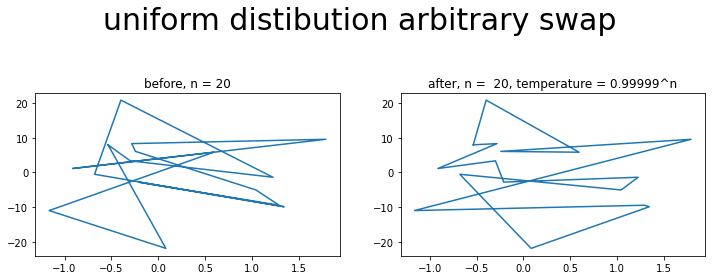

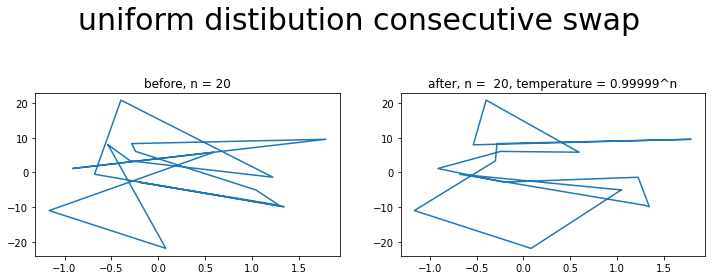

In [55]:
n = 16

A = generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
A += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
A += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))
A += generate_gauss([0,0], [[1,0], [0, 100]], size=int(n/4))

B = deepcopy(A)
run(array=A, start=20,end=21,step=20, title="uniform distibution arbitrary swap",steps = 5e5)
run(array=B, start=20,end=21,step=20,mode=consecutive_swap, title="uniform distibution consecutive swap",steps = 5e5)
